In [29]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
from pandas_datareader import data

df = data.DataReader('7203.JP', 'stooq')
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-03,3402.00,3428.00,3321.00,3341.00,34205700
2024-05-31,3370.00,3401.00,3348.00,3401.00,34664500
2024-05-30,3350.00,3358.00,3307.00,3330.00,23500000
2024-05-29,3435.00,3452.00,3390.00,3390.00,19973000
2024-05-28,3440.00,3452.00,3416.00,3448.00,14393400
...,...,...,...,...,...
2019-06-12,1313.93,1330.03,1311.22,1322.27,31905505
2019-06-11,1302.29,1314.71,1301.91,1314.71,24675890
2019-06-10,1293.57,1301.71,1286.78,1300.55,26276395


In [37]:
close = df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)#終値のみにする
close = close.sort_values('Date')#日付を昇順に

close

,Close
Date,
2019-06-06,1269.71
2019-06-07,1277.66
2019-06-10,1300.55
2019-06-11,1314.71
2019-06-12,1322.27
...,...
2024-05-28,3448.00
2024-05-29,3390.00
2024-05-30,3330.00


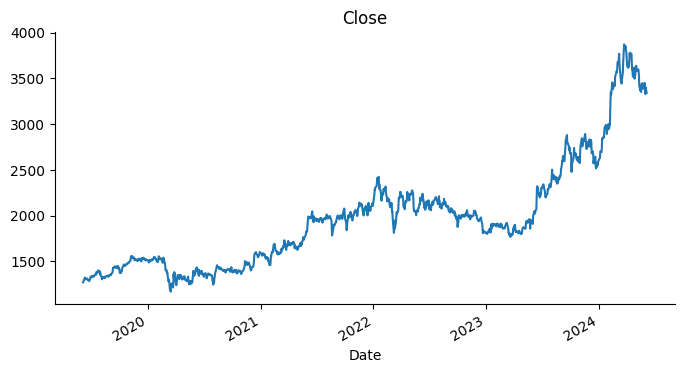

In [12]:
# @title Close

from matplotlib import pyplot as plt
close['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qfyv7gs/rlhg9sbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qfyv7gs/lbtxbap3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54250', 'data', 'file=/tmp/tmp3qfyv7gs/rlhg9sbt.json', 'init=/tmp/tmp3qfyv7gs/lbtxbap3.json', 'output', 'file=/tmp/tmp3qfyv7gs/prophet_modelp7bq2e4w/prophet_model-20240604064446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


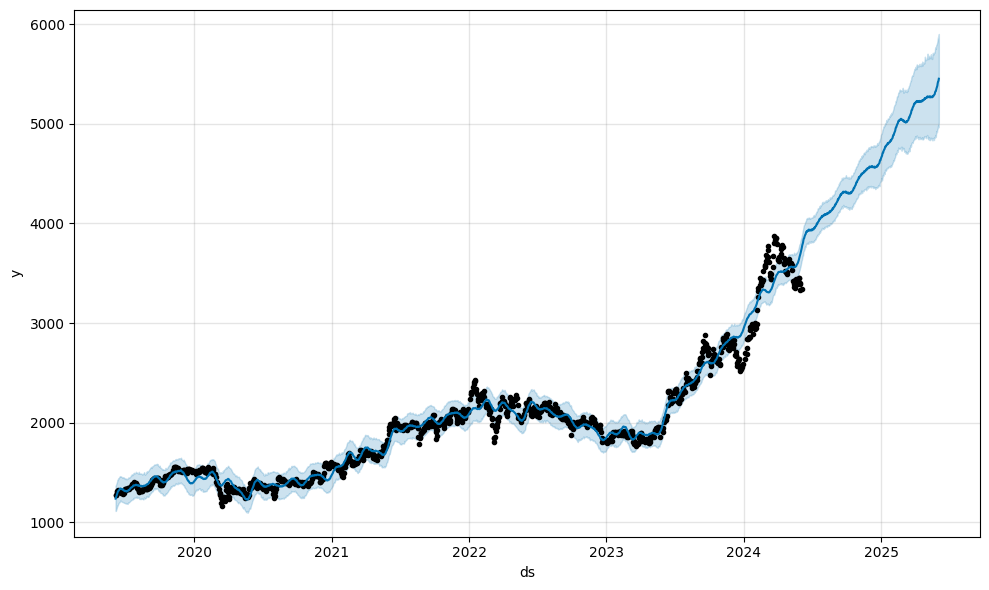

In [40]:
hist = pd.DataFrame(columns = ['ds', 'y'])
hist['y'] = close['Close'].copy()
hist['ds'] = close.index.copy()
hist['ds'] = hist['ds'].dt.tz_localize(None)

hist

# モデル作成
model = Prophet(
    # 各周期のトレンドを考慮するか
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()